In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_price = pd.read_csv("USA_Housing.csv")

In [3]:
housing_price.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing_price.drop("Address",axis=1,inplace=True)

In [5]:
################## Feature Scalling ###################

for i in housing_price.columns:
    housing_price[i] = housing_price[i]/housing_price[i].max()

In [6]:
housing_price.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.738572,0.596996,0.651436,0.629231,0.331603,0.428921
1,0.735816,0.630617,0.625565,0.475385,0.577019,0.609903
2,0.569044,0.616224,0.791176,0.789231,0.529751,0.428902
3,0.588154,0.755139,0.519233,0.501538,0.492810,0.510564
4,0.556929,0.529521,0.728596,0.650769,0.378533,0.255539


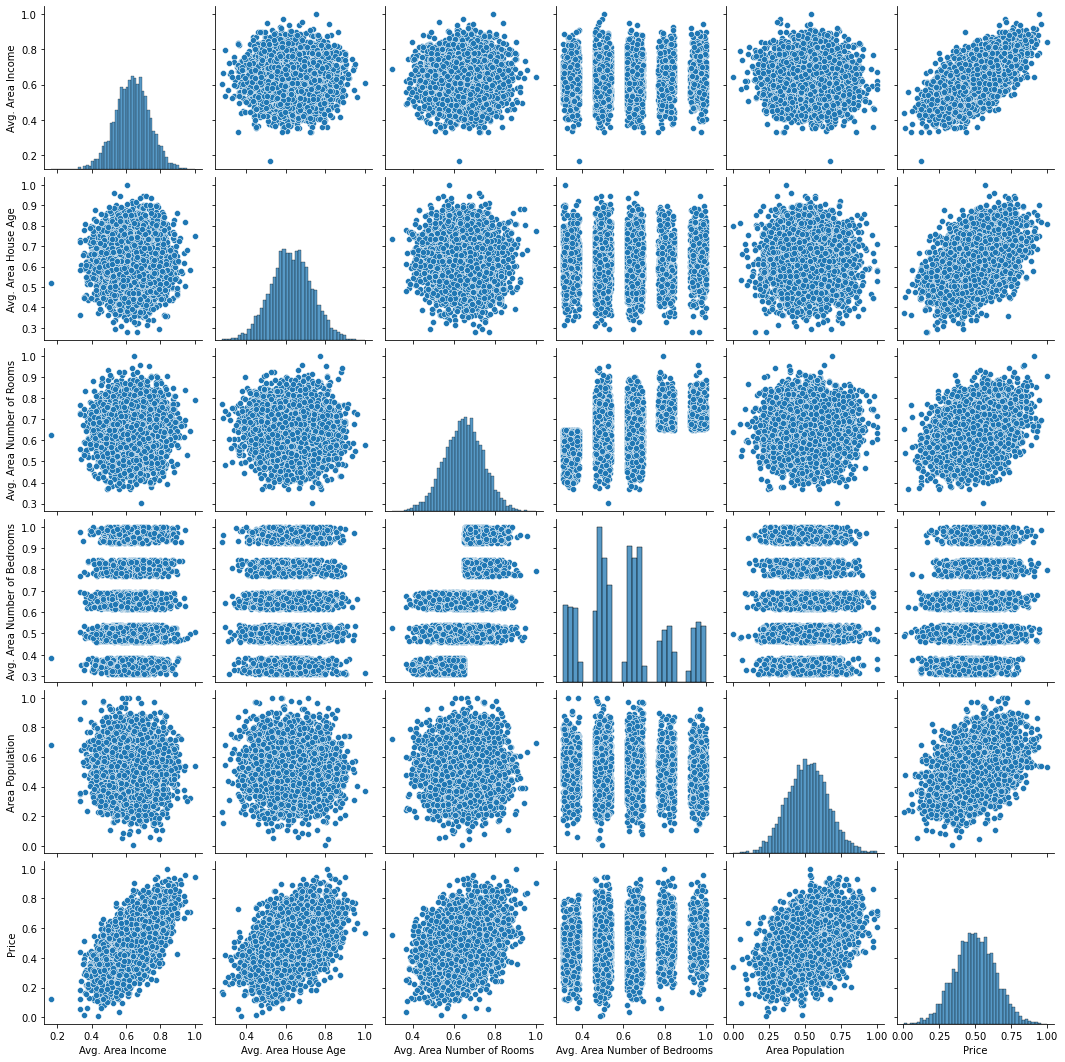

In [7]:
sns.pairplot(housing_price)

In [24]:
############################# Linear Regression Model ##############################

class Linear_Regression:
    def __init__(self):
        self.w = []
    def predict(self,x):
        x.insert(0,"ONE",1)
        x = np.array(x)
        y_p = np.dot(self.w.T,x.T)
        return y_p
    def fit(self,x,y):
        x.insert(0,"ONE",1)
        x = np.array(x)
        y = np.array(y)
        y = y.reshape(y.shape[0],1)
        print("Calculating............")
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
        print("Finish.")
    def coef_(self):
        return self.w

In [15]:
housing_price.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [25]:
x_train = housing_price[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y_train = housing_price.Price

In [26]:
model = Linear_Regression()

In [27]:
model.fit(x_train,y_train)

Calculating............
Finish.


In [39]:
x = housing_price[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [29]:
model.predict(x.head())

array([[0.49567215, 0.60546698, 0.50748621, 0.45410866, 0.34239219]])

In [30]:
housing_price.head().Price

0    0.428921
1    0.609903
2    0.428902
3    0.510564
4    0.255539
Name: Price, dtype: float64

In [35]:
model.coef_()

array([[-1.06813648],
       [ 0.94124419],
       [ 0.6385871 ],
       [ 0.52580676],
       [ 0.00434675],
       [ 0.42862443]])

In [40]:
y_p = model.predict(x.head())

In [41]:
y_p

array([[0.49567215, 0.60546698, 0.50748621, 0.45410866, 0.34239219]])

In [42]:
y_p*2469065.5941747027

array([[1223847.04275356, 1494937.6916173 , 1253016.74608152,
        1121224.06765068,  845388.76629535]])

In [43]:
np.int32(y_p*2469065.5941747027)

array([[1223847, 1494937, 1253016, 1121224,  845388]])